**THWISHA NAHENDER**



**GRIP: THE SPARKS FOUNDATION**

**To perform Exploratory Data Analysis on dataset Indian Premier League**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_matches=pd.read_csv("/content/matches.csv",index_col=0)
data_deliveries=pd.read_csv("/content/deliveries.csv",index_col=0)
print("data is loaded successfully")


data is loaded successfully


In [ ]:
data_matches.head(6)


,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [ ]:
data_deliveries.head(6)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,6.0,S Dhawan,DA Warner,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
data_matches.columns.values

array(['season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [ ]:
#Checking for null values
data_matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
print("City where most matches have been won:",data_matches['city'].value_counts().idxmax())
print("Player who has been man of the match most number of times:",data_matches['player_of_match'].value_counts().idxmax())
print("Team that has won most number of times:",data_matches['winner'].value_counts().idxmax())
print("Most frequent umpire1:",data_matches['umpire1'].value_counts().idxmax())
print("Most frequent umpire2:",data_matches['umpire2'].value_counts().idxmax())



City where most matches have been won: Mumbai
Player who has been man of the match most number of times: CH Gayle
Team that has won most number of times: Mumbai Indians
Most frequent umpire1: HDPK Dharmasena
Most frequent umpire2: S Ravi


In [ ]:
#dropping the column named umpire3 and filling null values 
data_matches = data_matches.drop(columns=["umpire3"],axis=1)
data_matches['city'].fillna(value="Mumbai",inplace=True)
data_matches['player_of_match'].fillna(value="CH Gayle",inplace=True)
data_matches['winner'].fillna(value="Mumbai Indians",inplace=True)
data_matches['umpire1'].fillna(value="HDPK Dharmasena",inplace=True)
data_matches['umpire2'].fillna(value="S Ravi",inplace=True)


In [ ]:
data_matches.isnull().sum()


season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
#printing the shape of datasets
print("The shape of dataset matches is",data_matches.shape)
print("The shape of dataset matches is",data_deliveries.shape)


The shape of dataset matches is (756, 16)
The shape of dataset matches is (10330, 20)


In [ ]:
data_matches.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
data_matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

data_deliveries.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

In [ ]:
#number of times team chose to bat first
print(data_matches['team1'].value_counts())

MI      101
KXIP     91
CSK      89
RCB      85
KKR      83
DD       72
RR       67
SRH      63
DC       43
PW       20
RPS      15
GL       14
KTK       7
DCa       6
Name: team1, dtype: int64


In [ ]:
#number of times teams have chose to bat second
print(data_matches['team2'].value_counts())

RCB     95
KKR     95
DD      89
MI      86
KXIP    85
RR      80
CSK     75
SRH     45
DC      32
PW      26
GL      16
RPS     15
DCa     10
KTK      7
Name: team2, dtype: int64


In [ ]:
#Checking the wins per season 
wins=data_matches.groupby("season")['winner'].value_counts()
wins

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KKR        6
        KXIP       6
        SRH        6
        RCB        5
        RR         5
Name: winner, Length: 100, dtype: int64

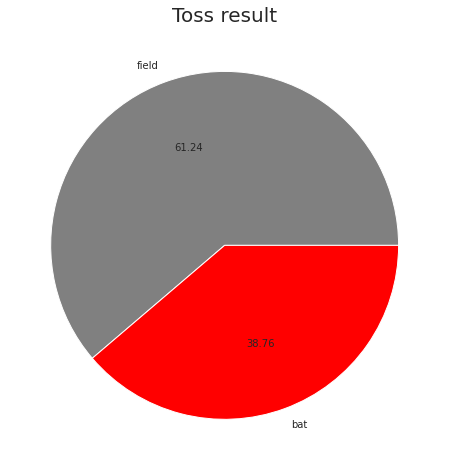

In [ ]:
#number of times toss winner has chosen to field versus bat
toss= data_matches['toss_decision'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors=['grey','red']
fig = plt.figure(figsize =(15, 8))
plt.pie(sizes, labels = labels,colors=colors,autopct='%.2f')
plt.title('Toss result',size=20)

plt.show()

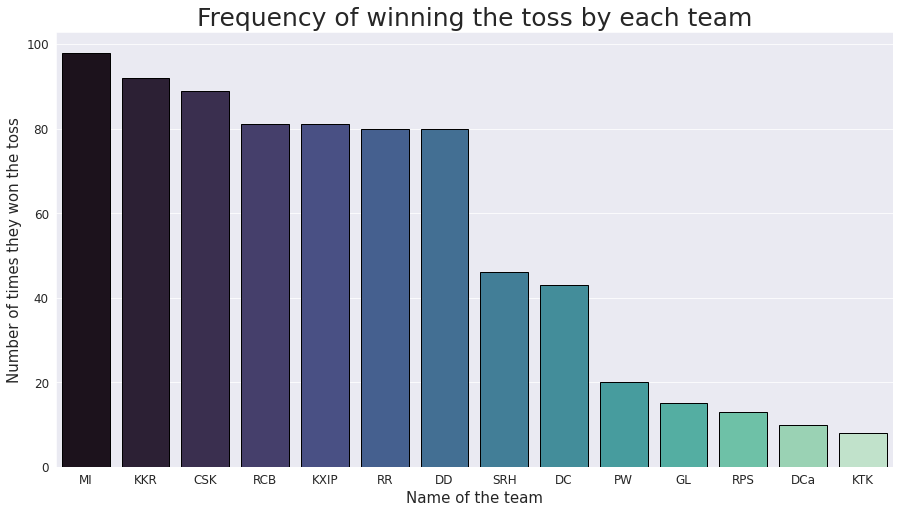

In [ ]:
#Checking the number of times each team has won the toss
plt.figure(figsize=(15,8))
sns.countplot(x=data_matches['toss_winner'],palette='mako', edgecolor='black',order = data_matches['toss_winner'].value_counts().index)
plt.title('Frequency of winning the toss by each team', size=25)
plt.xlabel('Name of the team', size=15)
plt.ylabel('Number of times they won the toss', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

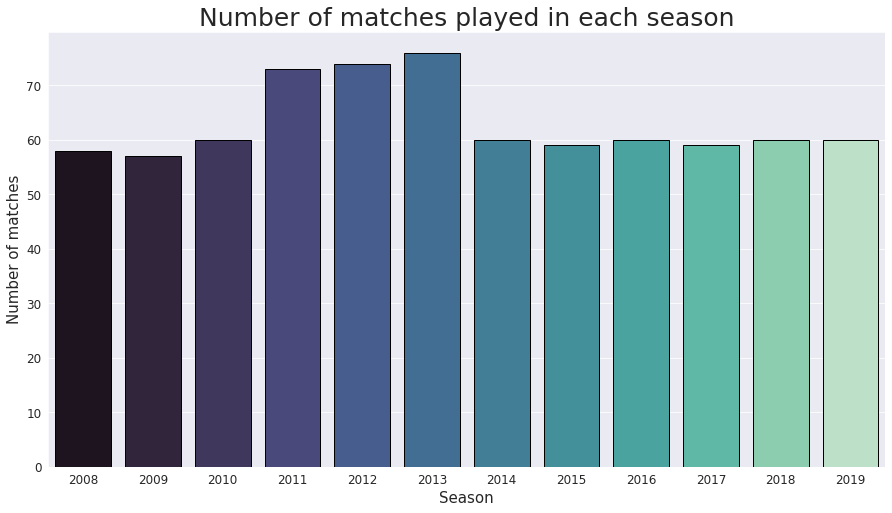

In [ ]:
#Checking the frequency of matches played in each season 
plt.figure(figsize=(15,8))
sns.countplot(x=data_matches['season'], palette='mako', edgecolor='black')
plt.title('Number of matches played in each season', size=25)
plt.xlabel('Season', size=15)
plt.ylabel('Number of matches', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

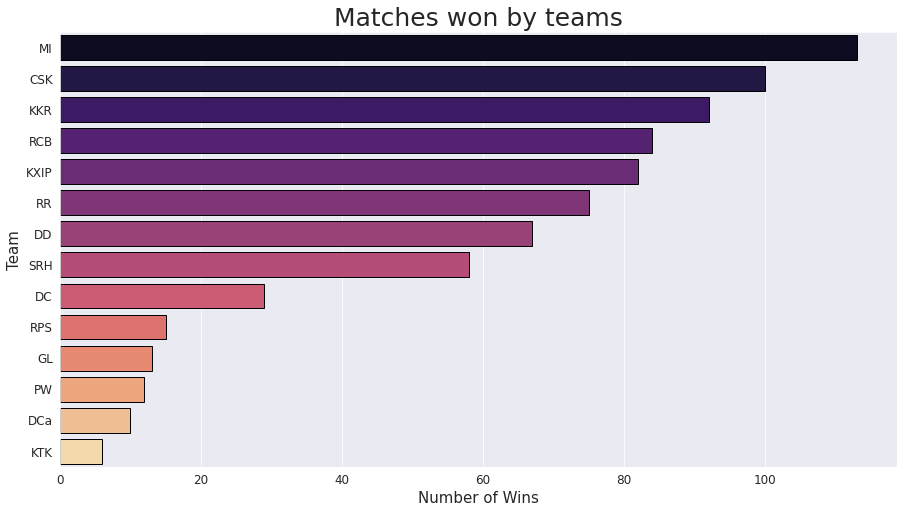

In [ ]:
#Number of matches won by each team
plt.figure(figsize=(15,8))
sns.countplot(y=data_matches['winner'], palette='magma', edgecolor='black',order = data_matches['winner'].value_counts().index)
plt.title('Matches won by teams', size=25)
plt.ylabel('Team', size=15)
plt.xlabel('Number of Wins', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

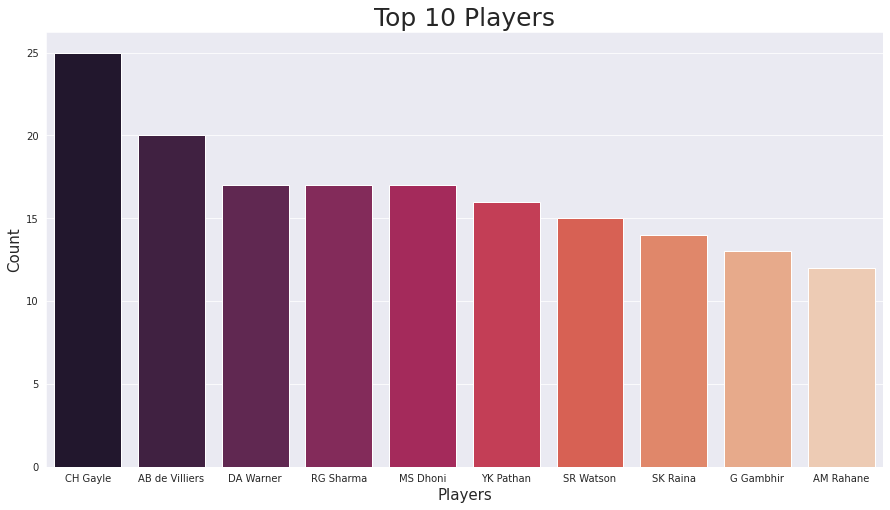

In [ ]:
#Finding the top 10 players throughout all the seasons
plt.figure(figsize=(15,8))
sns.barplot(x=data_matches['player_of_match'].value_counts()[:10].index, y=data_matches['player_of_match'].value_counts()[:10].values,palette='rocket')
plt.title('Top 10 Players', size=25 )
plt.xlabel('Players' , size=15 )
plt.ylabel('Count', size=15 )
plt.show()

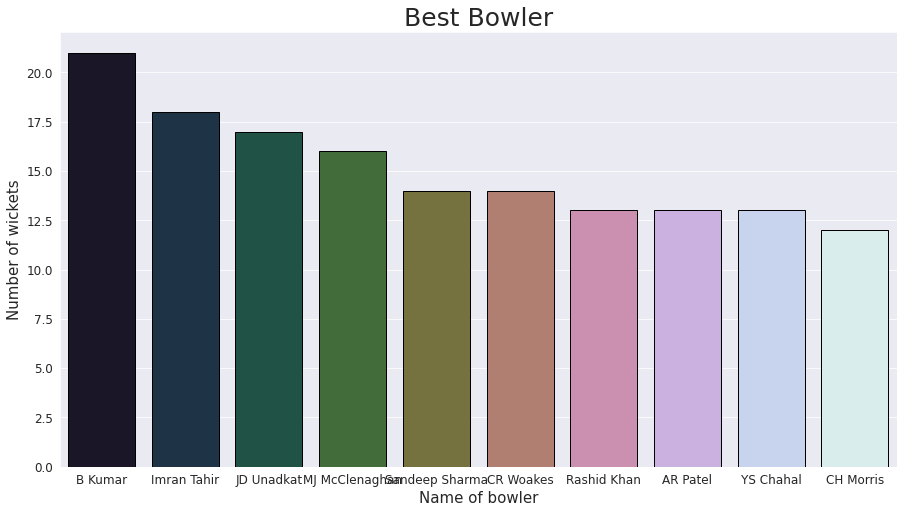

In [ ]:
#Best overall bowler throughtout all the seasons
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler=data_deliveries.loc[data_deliveries["dismissal_kind"].isin(dismissal)]
best_bowler=best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']
plt.figure(figsize=(15,8))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='cubehelix', edgecolor='black')
plt.title('Best Bowler', size=25)
plt.ylabel('Number of wickets', size=15)
plt.xlabel('Name of bowler', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

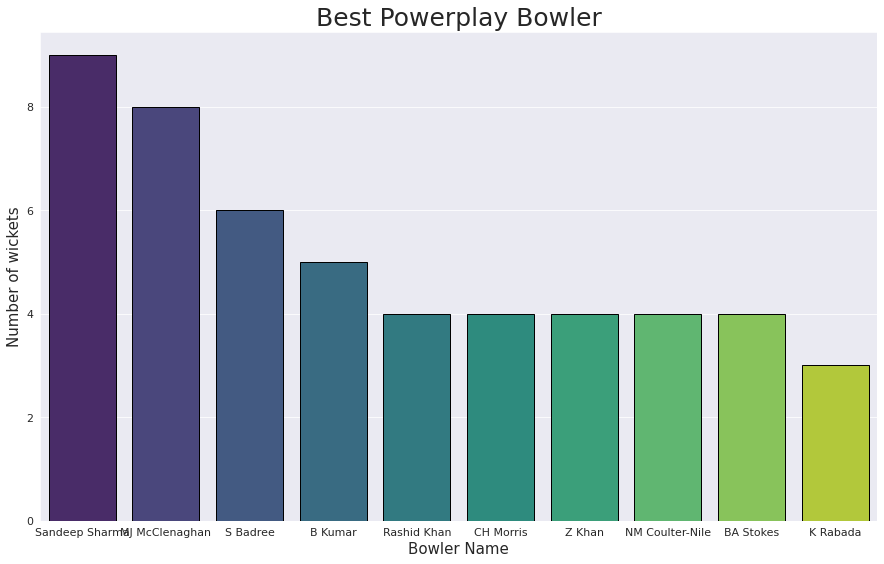

In [ ]:
powerplay=[1,2,3,4,5,6]
best_powerplaybowler=data_deliveries.loc[data_deliveries["dismissal_kind"].isin(dismissal) & data_deliveries['over'].isin(powerplay)]
best_powerplaybowler=best_powerplaybowler['bowler'].value_counts().reset_index().head(10)
best_powerplaybowler.columns = ['bowler', 'wickets']
plt.figure(figsize=(15,9))
sns.barplot(x=best_powerplaybowler['bowler'], y=best_powerplaybowler['wickets'],palette='viridis', edgecolor='black')
plt.title('Best Powerplay Bowler', size=25)
plt.ylabel('Number of wickets', size=15)
plt.xlabel('Bowler Name', size=15)
plt.yticks(size=11)
plt.xticks(size=11)
plt.show()

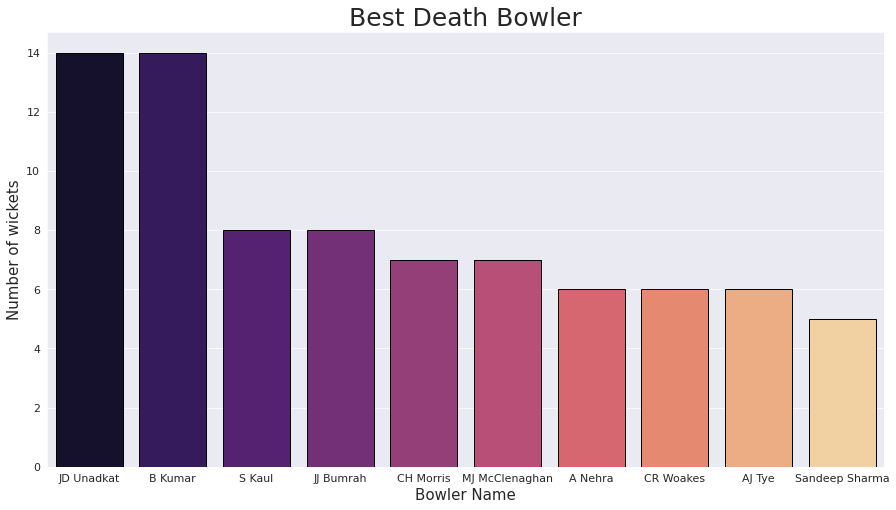

In [ ]:
death=[16,17,18,19,20]
best_deathbowler=data_deliveries.loc[data_deliveries["dismissal_kind"].isin(dismissal) & data_deliveries['over'].isin(death)]
best_deathbowler=best_deathbowler['bowler'].value_counts().reset_index().head(10)
best_deathbowler.columns = ['bowler', 'wickets']
plt.figure(figsize=(15,8))
sns.barplot(x=best_deathbowler['bowler'], y=best_deathbowler['wickets'],palette='magma', edgecolor='black')
plt.title('Best Death Bowler', size=25)
plt.ylabel('Number of wickets', size=15)
plt.xlabel('Bowler Name', size=15)
plt.yticks(size=11)
plt.xticks(size=11)
plt.show()

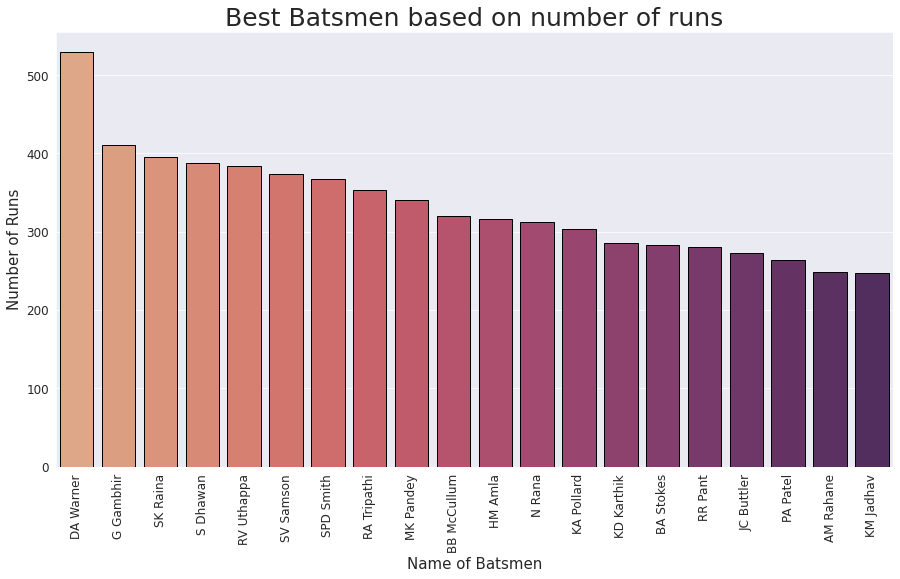

In [ ]:
best_batsman = data_deliveries.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(20)

plt.figure(figsize=(15,8))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='flare',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen based on number of runs', size=25)
plt.ylabel('Number of Runs', size=15)
plt.xlabel('Name of Batsmen', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

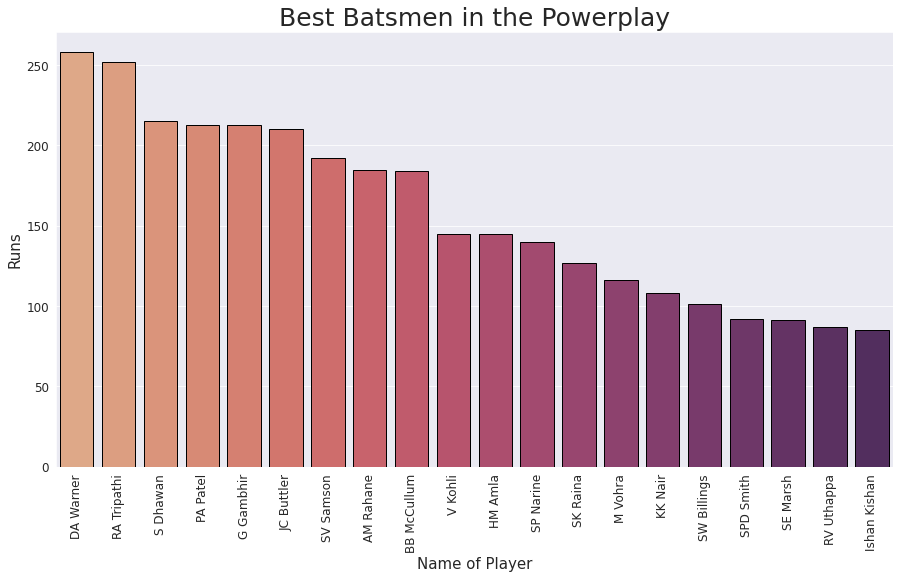

In [ ]:

best_powerbatsman = data_deliveries.loc[data_deliveries['over'].isin(powerplay)]
best_powerbatsman = best_powerbatsman.groupby(['batsman']).batsman_runs.sum().reset_index()
best_powerbatsman = best_powerbatsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(20)

plt.figure(figsize=(15,8))
sns.barplot(x=best_powerbatsman.index, y=best_powerbatsman['batsman_runs'], palette='flare',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen in the Powerplay', size=25)
plt.ylabel('Runs', size=15)
plt.xlabel('Name of Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

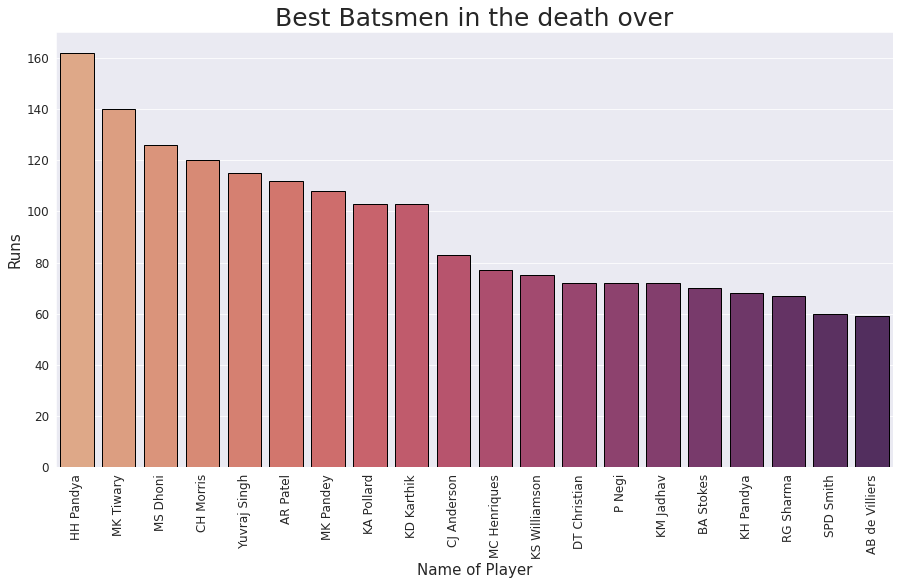

In [ ]:

best_deathbatsman = data_deliveries.loc[data_deliveries['over'].isin(death)]
best_deathbatsman = best_deathbatsman.groupby(['batsman']).batsman_runs.sum().reset_index()
best_deathbatsman = best_deathbatsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(20)

plt.figure(figsize=(15,8))
sns.barplot(x=best_deathbatsman.index, y=best_deathbatsman['batsman_runs'], palette='flare',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen in the death over', size=25)
plt.ylabel('Runs', size=15)
plt.xlabel('Name of Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

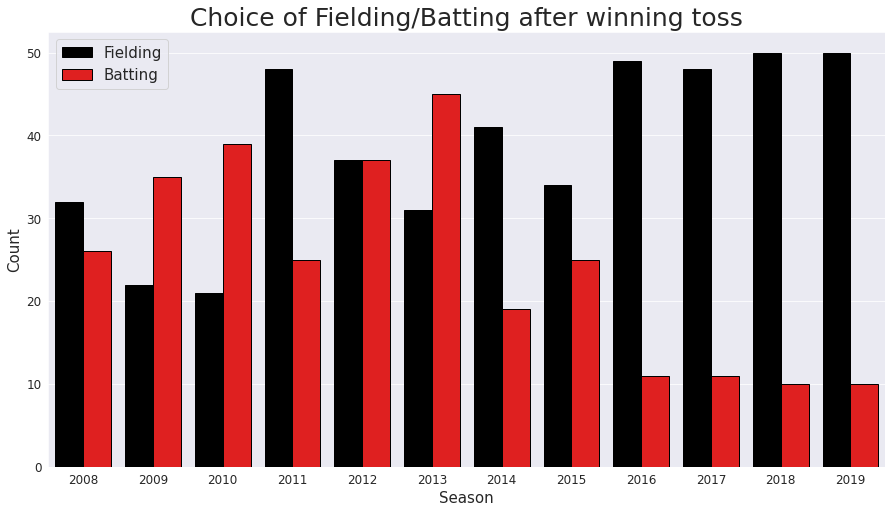

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=data_matches['season'],hue=data_matches['toss_decision'] 
              ,palette=dict(field='black',bat='red'), edgecolor='black')
plt.title('Choice of Fielding/Batting after winning toss', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Season', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(('Fielding', 'Batting'), prop={"size" :15})
plt.show()

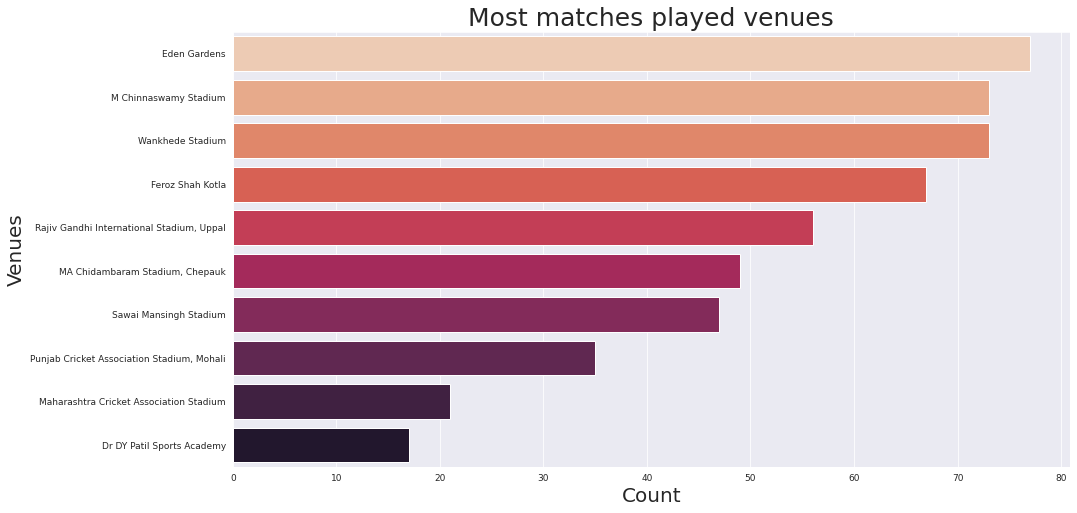

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=data_matches['venue'].value_counts().head(10).index, x=data_matches['venue'].value_counts().head(10).values, palette = 'rocket_r')
plt.title('Most matches played venues', fontsize=25)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Venues',fontsize=20)
plt.yticks(size=9)
plt.xticks(size=9)
plt.show()

 **Most Successful teams : Mumbai Indians and Chennai Super kings**
 

**Most Successful Players: CH Gayle, V Kohli, AB de villiers, SL Malinga**

According to the data analysis and based on the number of matches won due to these players and the number of times they have been player of the match

**Companies that are looking to endorse players for their products should definately endorse :** **CH Gayle, V Kohli, AB de villiers, MS Dhoni, SL Malinga and D Warner**